![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)

# **Scikit-image Final Bootcamp**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/ISIS_4825_skimage_last/blob/master/Scikit_Image_Final_Bootcamp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# **Contenido**
## **Extracción de Características**
-  Ya segmentamos nuestras imágenes, y ¿Ahora qué?
- Buscamos formas de representar y/o describir lo que encontramos en términos de sus bordes, de su región o de la imagen completa


1. [**Preprocesamiento de Contornos**](#id1):
    - [**Seguimiento de Contornos Vs. Detección de Contornos**](#id1-1)
    - [**Esqueletización Morfológica Vs. Transformada del Eje Medio**](#id1-2)
    - [**Código de Cadena de Freeman**](#id1-3)
    - [**Firma de Contornos**](#id1-4)
    - [**Polígonos de Perímetro Mínimo**](#id1-5)
2. [**Características de Frontera**](#id2):
    - [**Diámetro Local**](#id2-1)
    - [**Longitud**](#id2-2)
3. [**Características de Región**](#id3):
    - [**Circularidad**](#id3)
    - [**Excentricidad**](#id3)
    - [**Compacidad**](#id3)
    - [**Número de Euler como Descriptor Topológico**](#id3)
    - [**Descriptor de Textura - Momentos de Orden N**](#id3)
4. [**Características de la Imagen**](#id4):
    - [**Histograma De Gradientes Orientados**](#id4-1)

In [1]:
import cv2
from skimage import io
from utils import visualization as vis
from skimage.filters import threshold_otsu, sobel
from skimage.exposure import equalize_hist, rescale_intensity
from skimage.measure import (find_contours, 
                             approximate_polygon, 
                             subdivide_polygon, label, 
                             regionprops, regionprops_table)
from skimage.feature import hog
from skimage import data
from skimage import morphology

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from skimage import color

import scipy.ndimage as ndi

In [2]:
url = "https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2004/images/planets.png?raw=true"

# **Preprocesamiento de Contornos**<a name="id1"></a>
## **Seguimiento de Contornos Vs. Detección de Contornos**<a name="id1-1"></a>
![image](https://i.stack.imgur.com/RNImW.jpg)

In [3]:
img = vis.download_content(url)

Descargando archivos: 100%|█████████▉| 386/387 [00:00<00:00, 623.30KB/s]


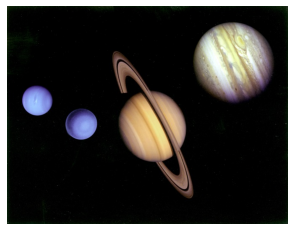

In [4]:
vis.imshow(img)

In [5]:
img_gray = color.rgb2gray(img)

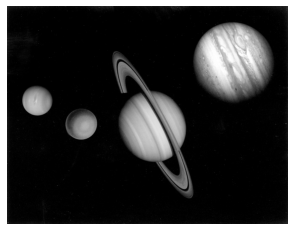

In [6]:
vis.imshow(img_gray)

In [7]:
thresh = threshold_otsu(img_gray)

In [8]:
segmented_img = (img_gray > thresh).astype("uint8")

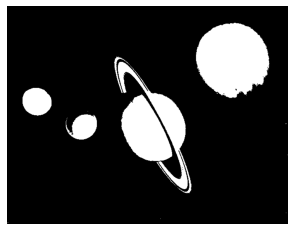

In [9]:
vis.imshow(segmented_img)

In [10]:
contours, _ = cv2.findContours(segmented_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
contours

[array([[[  2, 515]],
 
        [[  1, 516]]], dtype=int32),
 array([[[365, 506]]], dtype=int32),
 array([[[664, 492]]], dtype=int32),
 array([[[428, 446]]], dtype=int32),
 array([[[406, 432]],
 
        [[407, 433]]], dtype=int32),
 array([[[402, 428]]], dtype=int32),
 array([[[398, 425]],
 
        [[399, 425]],
 
        [[400, 426]],
 
        [[399, 425]]], dtype=int32),
 array([[[410, 409]]], dtype=int32),
 array([[[414, 400]]], dtype=int32),
 array([[[357, 371]],
 
        [[356, 372]],
 
        [[358, 374]],
 
        [[358, 375]],
 
        [[360, 377]],
 
        [[360, 378]],
 
        [[363, 381]],
 
        [[363, 382]],
 
        [[364, 383]],
 
        [[364, 384]],
 
        [[369, 389]],
 
        [[369, 390]],
 
        [[370, 391]],
 
        [[370, 392]],
 
        [[373, 395]],
 
        [[373, 396]],
 
        [[377, 400]],
 
        [[377, 401]],
 
        [[378, 401]],
 
        [[379, 402]],
 
        [[379, 403]],
 
        [[382, 406]],
 
        [[382, 407]

In [42]:
draw = cv2.drawContours(segmented_img.copy(), contours, -1, (255, 255, 0), 2)

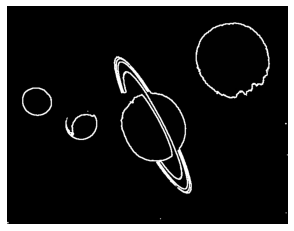

In [43]:
vis.imshow(draw)

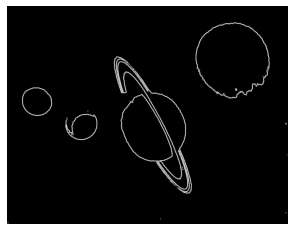

In [45]:
edges = sobel(segmented_img)
vis.imshow(edges)

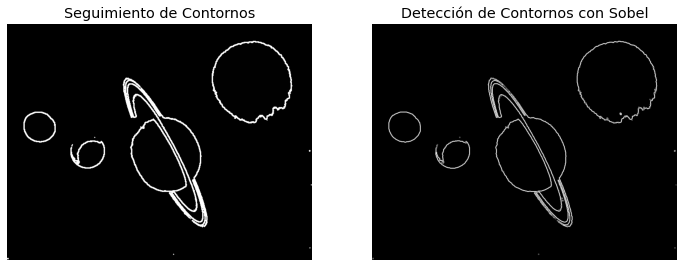

In [48]:
vis.visualize_subplot([draw, edges], 
                      ["Seguimiento de Contornos", 
                       "Detección de Contornos con Sobel"], (1, 2), (12, 6))

### **Preguntas**
- ¿Cuál es la diferencia entre la detección de contornos y el seguimiento de contornos?
- ¿Cómo se podría preprocesar la imagen para recuperar la forma circular de los planetas, que se perdió durante la umbralización, sin afectar los anillos de Saturno?

## **Esqueletización Morfológica Vs. Transformada del Eje Medio**<a name="id1-2"></a>

![image](https://plantcv.readthedocs.io/en/stable/img/documentation_images/find_tips/tips_debug.jpg)

In [ ]:
url_angio = "https://www.radiologyinfo.org/gallery-items/images/ICA-Angiogram.jpg"

In [ ]:
img = vis.download_content(url_angio)

Descargando archivos:  95%|█████████▌| 19/20 [00:00<00:00, 3988.18KB/s]


In [ ]:
img_gray = color.rgb2gray(img)

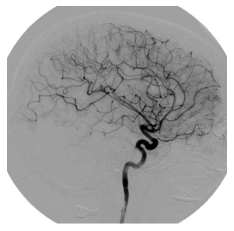

In [ ]:
vis.imshow(img_gray)

In [ ]:
segmented = (img_gray < 0.4).astype("uint8")

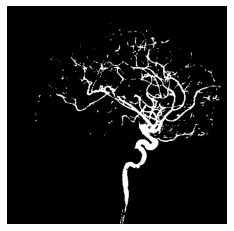

In [ ]:
vis.imshow(segmented)

In [ ]:
skeleton = vis.skeletonize(segmented)

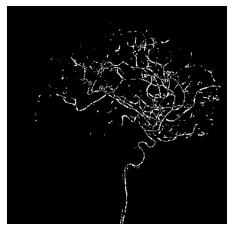

In [ ]:
vis.imshow(skeleton)

In [ ]:
medial_transform = morphology.medial_axis(segmented)

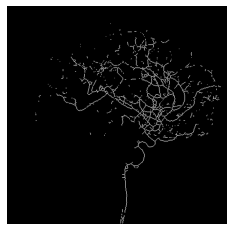

In [ ]:
vis.imshow(medial_transform)

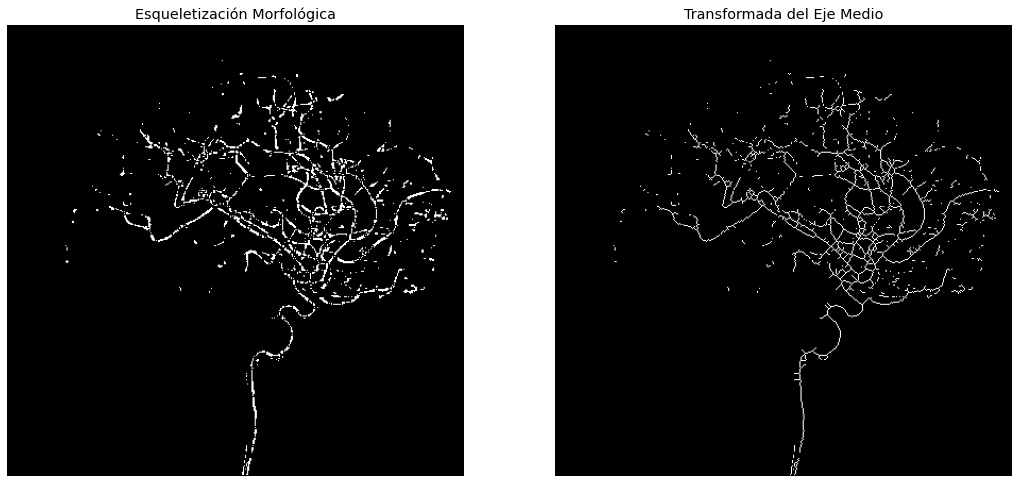

In [ ]:
vis.visualize_subplot([skeleton, medial_transform],
                      ["Esqueletización Morfológica", 
                       "Transformada del Eje Medio"], (1, 2), (18, 9))

In [ ]:
segmented = np.logical_not(data.horse()).astype("uint8")

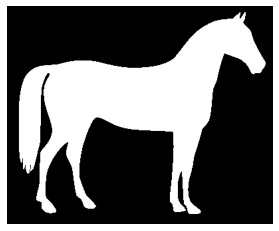

In [ ]:
vis.imshow(segmented)

In [ ]:
skeleton = vis.skeletonize(segmented)
medial_transform = morphology.medial_axis(segmented)

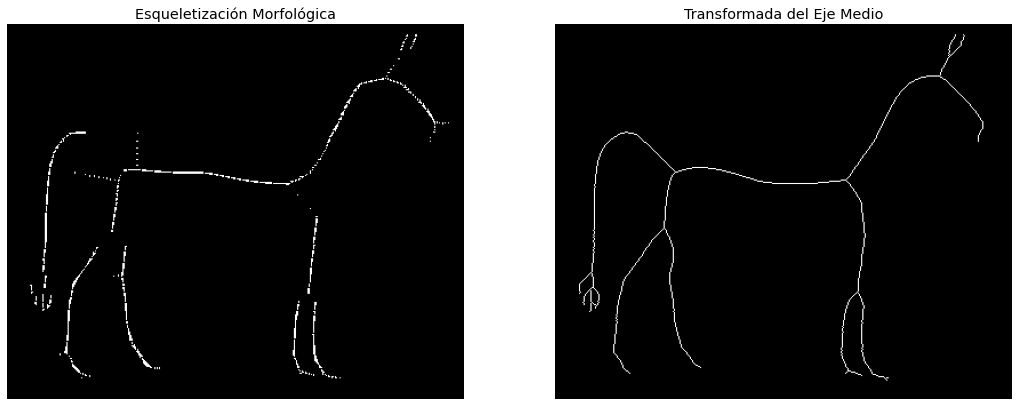

In [ ]:
vis.visualize_subplot([skeleton, medial_transform],
                      ["Esqueletización Morfológica", 
                       "Transformada del Eje Medio"], (1, 2), (18, 9))

In [ ]:
url_tree = "https://estaticos.muyinteresante.es/media/cache/1000x460_thumb/uploads/images/test/5af18b675bafe8cd7d3c986b/arbol.jpg"

In [ ]:
arbol = vis.download_content(url_tree)

Descargando archivos:  85%|████████▍ | 56/66 [00:00<00:00, 223.14KB/s]


In [ ]:
arbol_gray = color.rgb2gray(arbol)

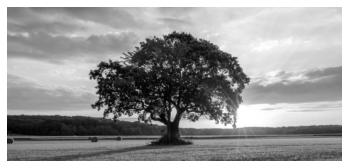

In [ ]:
vis.imshow(arbol_gray)

In [ ]:
thresh = threshold_otsu(arbol_gray)
segmented = (arbol_gray < thresh).astype("uint8")

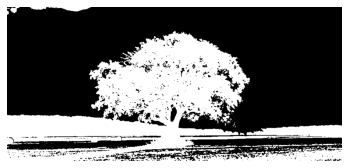

In [ ]:
vis.imshow(segmented)

In [ ]:
medial_transform = morphology.medial_axis(segmented)

In [ ]:
skeleton = vis.skeletonize(segmented)

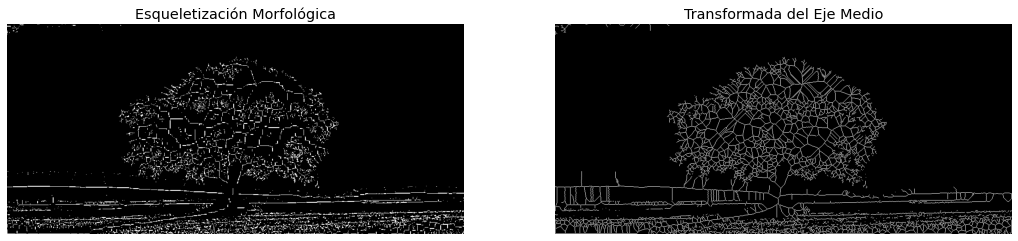

In [ ]:
vis.visualize_subplot([skeleton, medial_transform],
                      ["Esqueletización Morfológica", 
                       "Transformada del Eje Medio"], (1, 2), (18, 9))

### **Preguntas**
- Repetir el procedimiento con la siguiente [url](https://image.shutterstock.com/image-photo/group-people-260nw-602783837.jpg).

## **Código de Cadena de Freeman**<a name="id1-3"></a>
- ¿Cómo describimos una imagen en términos de su contorno? Aquí es donde entramos a usar el código de la cadema de Freeman.
![image](https://www.researchgate.net/profile/Kabir_Mamun/publication/305791915/figure/fig4/AS:391040709218307@1470242778549/Freeman-chain-code-of-a-contour.png)

In [15]:
leaf_url = "https://image.shutterstock.com/image-photo/green-perilla-leaf-known-shiso-260nw-416872249.jpg"

In [16]:
leaf = vis.download_content(leaf_url)
leaf_gray = color.rgb2gray(leaf)

Descargando archivos:  95%|█████████▌| 21/22 [00:00<00:00, 92.91KB/s]


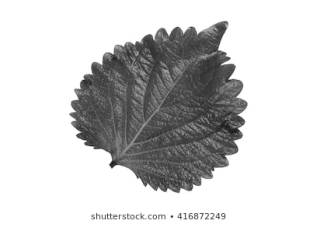

In [17]:
vis.imshow(leaf_gray)

In [18]:
segmented = (leaf_gray < .9).astype("uint8")
segmented = segmented[:250, :]

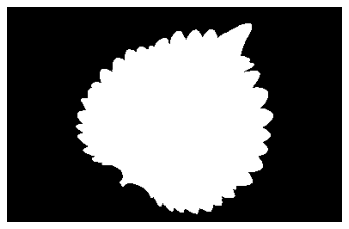

In [19]:
vis.imshow(segmented)

In [20]:
y, x = vis.find_start_point(segmented)

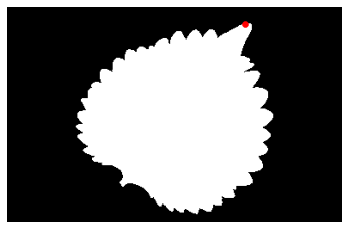

In [21]:
vis.imshow(segmented)
plt.scatter(x, y, color="r")
plt.show()

In [22]:
border, chain, count = vis.find_contours(segmented)

In [23]:
contours = find_contours(segmented, .8)

In [24]:
contour = max(contours, key=len)

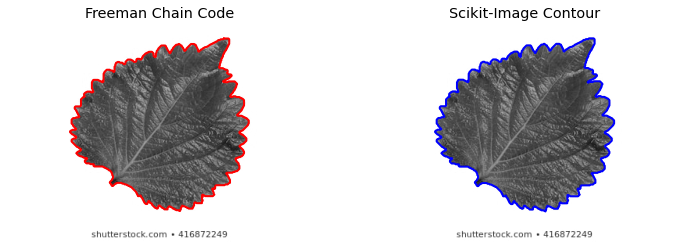

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(border[..., 1], border[..., 0], linewidth=2, color="r")
vis.imshow(leaf_gray, "Freeman Chain Code")

plt.subplot(122)
plt.plot(contour[..., 1], contour[..., 0], linewidth=2, color="b")
vis.imshow(leaf_gray, "Scikit-Image Contour")

plt.show()

In [26]:
for dir, code in zip(border, chain):
    print(f"Coordenada x: {dir[1]}, y: {dir[0]} - Freeman Code: {code}")

Coordenada x: 278, y: 19 - Freeman Code: 3
Coordenada x: 279, y: 19 - Freeman Code: 3
Coordenada x: 280, y: 19 - Freeman Code: 3
Coordenada x: 281, y: 19 - Freeman Code: 3
Coordenada x: 282, y: 19 - Freeman Code: 3
Coordenada x: 283, y: 19 - Freeman Code: 3
Coordenada x: 284, y: 20 - Freeman Code: 4
Coordenada x: 284, y: 21 - Freeman Code: 5
Coordenada x: 284, y: 22 - Freeman Code: 5
Coordenada x: 284, y: 23 - Freeman Code: 5
Coordenada x: 284, y: 24 - Freeman Code: 5
Coordenada x: 284, y: 25 - Freeman Code: 5
Coordenada x: 284, y: 26 - Freeman Code: 5
Coordenada x: 283, y: 27 - Freeman Code: 6
Coordenada x: 283, y: 28 - Freeman Code: 5
Coordenada x: 282, y: 29 - Freeman Code: 6
Coordenada x: 282, y: 30 - Freeman Code: 5
Coordenada x: 281, y: 31 - Freeman Code: 6
Coordenada x: 281, y: 32 - Freeman Code: 5
Coordenada x: 280, y: 33 - Freeman Code: 6
Coordenada x: 280, y: 34 - Freeman Code: 5
Coordenada x: 279, y: 35 - Freeman Code: 6
Coordenada x: 278, y: 36 - Freeman Code: 6
Coordenada 

## **Firma de Contornos**<a name="id1-4"></a>

In [27]:
cy, cx = ndi.center_of_mass(leaf_gray)

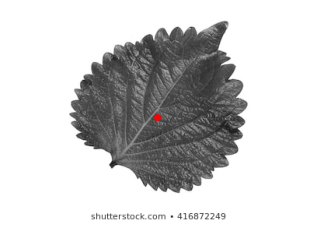

In [28]:
plt.scatter(cx, cy, color="r")
vis.imshow(leaf_gray)

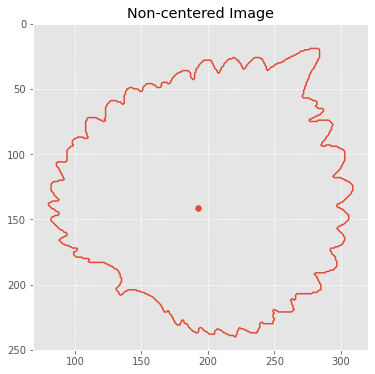

In [29]:
plt.figure(figsize=(6, 6))
plt.plot(border[..., 1], border[..., 0])
plt.scatter(cx, cy)
plt.grid(linestyle="--")
plt.title("Non-centered Image")
plt.ylim([250, 0])
plt.show()

In [30]:
border[..., 1] -= int(cx)
border[..., 0] -= int(cy)

In [31]:
polar_contour = np.array([vis.cart2pol(x, y) for x, y in border])

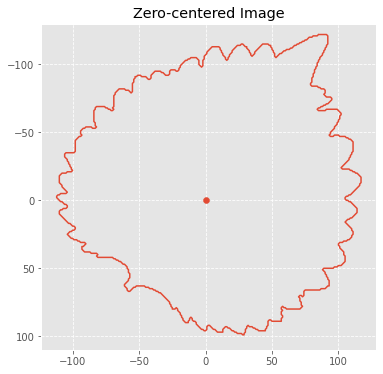

In [32]:
plt.figure(figsize=(6, 6))
plt.plot(border[..., 1], border[..., 0])
plt.scatter(0, 0)
plt.grid(linestyle="--")
plt.title("Zero-centered Image")
plt.ylim([110, -130])
plt.show()

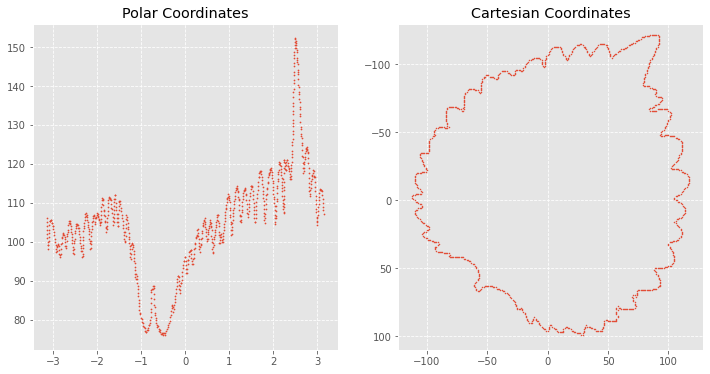

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(polar_contour[..., 1], polar_contour[..., 0], linewidth=0, s=3)
plt.title("Polar Coordinates")
plt.grid(linestyle="--")

plt.subplot(122)
plt.scatter(border[..., 1], border[..., 0], s=1)
plt.grid(linestyle="--")
plt.ylim([110, -130])
plt.title("Cartesian Coordinates")
plt.show()

## **Polígonos de Perímetro Mínimo**<a name="id1-5"></a>

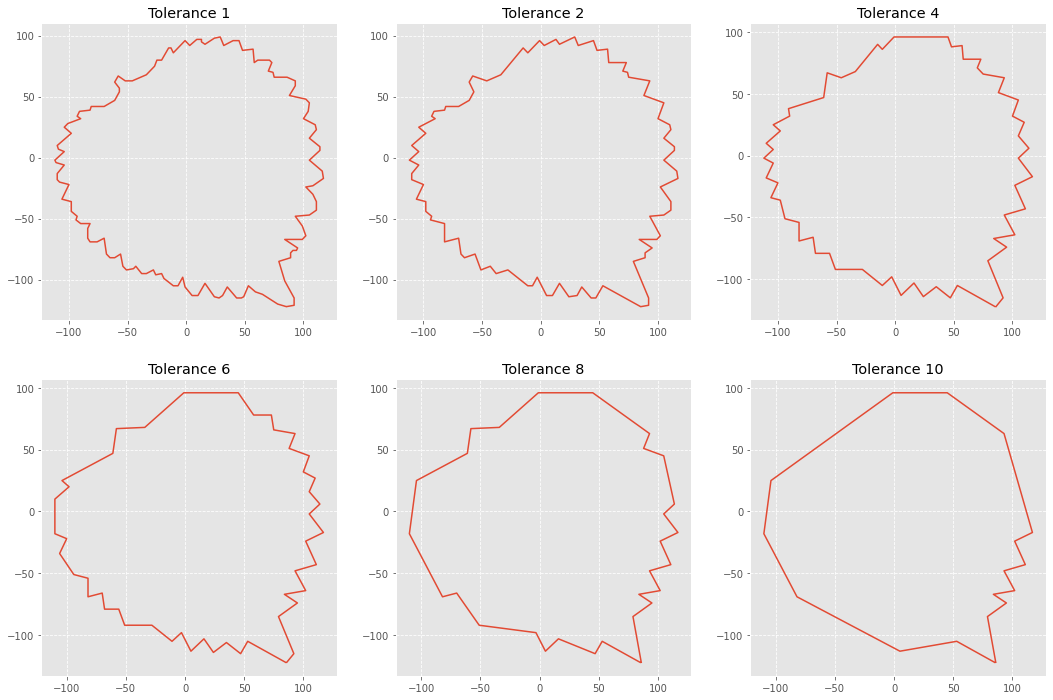

In [34]:
plt.figure(figsize=(18, 12))

plt.subplot(231)
coords = approximate_polygon(border, tolerance=1)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 1")

plt.subplot(232)
coords = approximate_polygon(border, tolerance=2)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 2")

plt.subplot(233)
coords = approximate_polygon(border, tolerance=4)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 4")

plt.subplot(234)
coords = approximate_polygon(border, tolerance=6)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 6")

plt.subplot(235)
coords = approximate_polygon(border, tolerance=8)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 8")

plt.subplot(236)
coords = approximate_polygon(border, tolerance=10)
plt.plot(coords[..., 1], coords[..., 0])
plt.grid(linestyle="--")
plt.title("Tolerance 10")

plt.show()

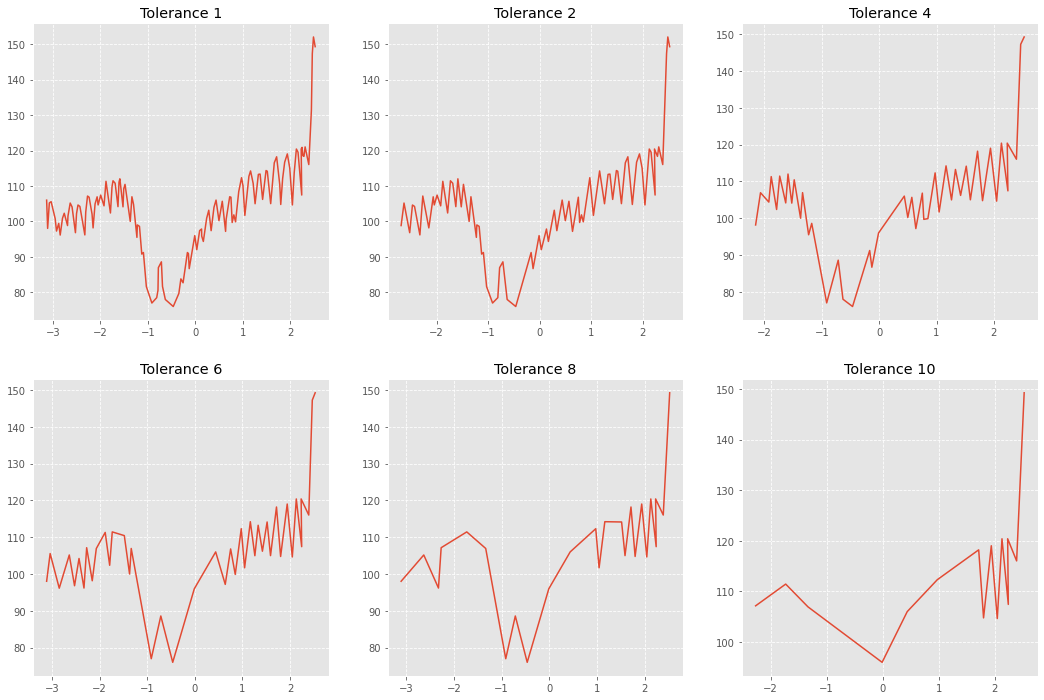

In [35]:
plt.figure(figsize=(18, 12))

plt.subplot(231)
coords = approximate_polygon(border, tolerance=1)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-15, 1], polar[:-15, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 1")

plt.subplot(232)
coords = approximate_polygon(border, tolerance=2)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-15, 1], polar[:-15, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 2")

plt.subplot(233)
coords = approximate_polygon(border, tolerance=4)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-15, 1], polar[:-15, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 4")

plt.subplot(234)
coords = approximate_polygon(border, tolerance=6)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-7, 1], polar[:-7, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 6")

plt.subplot(235)
coords = approximate_polygon(border, tolerance=8)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-5, 1], polar[:-5, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 8")

plt.subplot(236)
coords = approximate_polygon(border, tolerance=10)
polar = np.array([vis.cart2pol(x, y) for x, y in coords])
plt.plot(polar[:-3, 1], polar[:-3, 0])
plt.grid(linestyle="--")
plt.title("Tolerance 10")

plt.show()

### **Preguntas**
- ¿Qué pasaría si no uso el centro de masa como referencia para centrar la imagen?
- ¿Cómo afecta la toleracia al polígono de perímetro mínimo?
- Repetir el ejercicio con las siguiente [url](https://d25rq8gxcq0p71.cloudfront.net/dictionary-images/324/hand_FD9zpJx.jpg)

In [ ]:
url_planets = "https://hipertextual.com/files/2014/02/sistema-solar-tierra.jpg"

In [ ]:
planets = vis.download_content(url_planets)
planets_gray = color.rgb2gray(planets)

Descargando archivos:  97%|█████████▋| 32/33 [00:00<00:00, 3774.72KB/s]


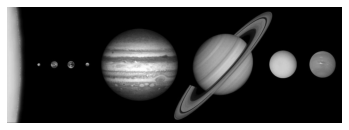

In [ ]:
vis.imshow(planets_gray)

In [ ]:
segmented = (planets_gray > 0.3).astype("uint8")

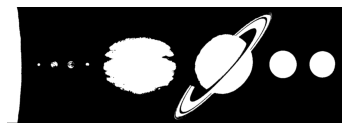

In [ ]:
vis.imshow(segmented)

In [ ]:
contours = find_contours(segmented, .8)

In [ ]:
contour = max(contours, key=len)

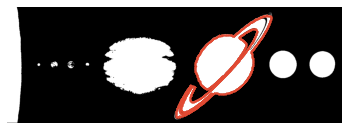

In [ ]:
plt.scatter(contour[..., 1], contour[..., 0], s=1)
vis.imshow(segmented)

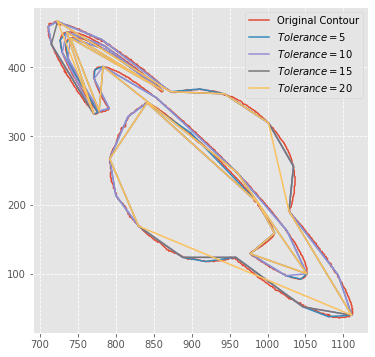

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(contour[... ,1], contour[..., 0], label=f"Original Contour")
for i in range(5, 21, 5):
    coords = approximate_polygon(contour, tolerance=i)
    plt.plot(coords[..., 1], coords[..., 0], label=f"$Tolerance={i}$")
plt.grid(linestyle="--")
plt.legend(loc="best")
plt.show()

### **Preguntas**
- Repetir el ejercicio con la siguiente [url](https://i.blogs.es/981b0d/screenshot-2/1366_2000.jpg) y suprima los astros pequeños.

# **Características de Frontera**<a name="id2"></a>
- Diametro Local
$$diameter(B)=max_{i, j}[D(p_i, p_j)]$$

- Longitud
$$length_m=[(x_2 - x_1)^2 + (y_2 - y_1)^2]^{\frac{1}{2}}$$

## **Diámetro Local**<a name="id2-1"></a>

In [37]:
leaf_url = "https://image.shutterstock.com/image-photo/green-perilla-leaf-known-shiso-260nw-416872249.jpg"

In [38]:
leaf = vis.download_content(leaf_url)
leaf_gray = color.rgb2gray(leaf)

Descargando archivos:  95%|█████████▌| 21/22 [00:00<00:00, 251.66KB/s]


In [39]:
segmented = (leaf_gray < .9).astype("uint8")
segmented = segmented[:250, :]

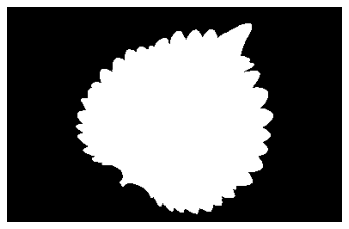

In [40]:
vis.imshow(segmented)

In [41]:
border, _, _ = vis.find_contours(segmented)

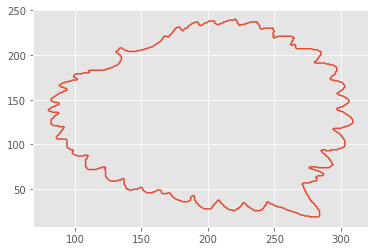

In [42]:
plt.plot(border[..., 1], border[..., 0])
plt.show()

In [43]:
a, b, dist = vis.diameter(border)

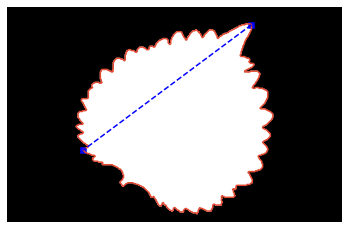

In [44]:
plt.plot(border[..., 1], border[..., 0])
plt.scatter(a[1], a[0], c="b", marker="s")
plt.scatter(b[1], b[0], c="b", marker="s")
plt.plot((a[1], b[1]), (a[0], b[0]), "--b")
vis.imshow(segmented)
plt.show()

## **Longitud**<a name="id2-2"></a>

In [ ]:
perimeter = vis.perimeter(border)

In [ ]:
perimeter

1043.1290757631377

In [ ]:
regionprops(segmented)[0]["perimeter"]

1045.543289325507

# **Características de Región**<a name="id3"></a>
1. **Circularidad:** $\frac{4\pi A}{p^2}$

2. **Compacidad:** $\frac{p^2}{A}$

3. **Excentricidad:** $\frac{c}{a}=\frac{\sqrt{a^2 - b^2}}{a}=\sqrt{1-(b/a)^2}$

4. **Número de Euler:** $C-H$

In [61]:
url_elipse = "https://p4.wallpaperbetter.com/wallpaper/5/875/596/nature-hole-texture-black-wallpaper-preview.jpg"

In [62]:
elipse = vis.download_content(url_elipse)
elipse_gray = color.rgb2gray(elipse)

Descargando archivos:  99%|█████████▉| 109/110 [00:00<00:00, 4191.61KB/s]


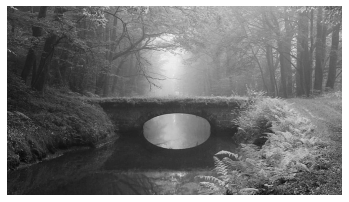

In [63]:
vis.imshow(elipse_gray)

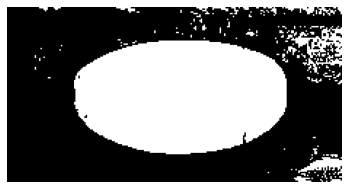

In [64]:
segmented = (elipse_gray > .3).astype("uint8")
segmented = segmented[210:330, 250:480]

vis.imshow(segmented)

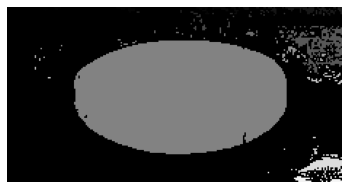

In [65]:
label_elipse = label(segmented)
vis.imshow(label_elipse)

In [66]:
regions = regionprops(label_elipse)

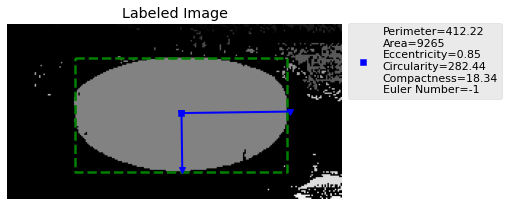

In [77]:
# Graficar Ejes.
for props in regions:
    if props["area"] > 500:
        y0, x0 = props["centroid"]
        
        # Cálculo de Números
        circ = 4*np.pi*props["area"]/props["perimeter"]
        comp = props["perimeter"]**2 / props["area"]
        label_v = f"Perimeter={props['perimeter']:.2f}\n"
        label_v += f"Area={props['area']}\n"
        label_v += f"Eccentricity={props['eccentricity']:.2f}\n"
        label_v += f"Circularity={circ:.2f}\n"
        label_v += f"Compactness={comp:.2f}\n"
        label_v += f"Euler Number={props['euler_number']}"
        plt.scatter(x0, y0, label=label_v, c="b", marker="s")
        
        # Bounding box
        minr, minc, maxr, maxc = props["bbox"]
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        plt.plot(bx, by, "--g", linewidth=2.5)
        
        # Vertices
        orientation = props["orientation"]
        x1 = x0 + np.cos(orientation) * .5 * props["minor_axis_length"]
        y1 = y0 - np.sin(orientation) * .5 * props["minor_axis_length"]
        
        x2 = x0 - np.sin(orientation) * .5 * props["major_axis_length"]
        y2 = y0 - np.cos(orientation) * .5 * props["major_axis_length"]
        
        plt.plot((x0, x1), (y0, y1), '-vb', linewidth=2)
        plt.plot((x0, x2), (y0, y2), '-vb', linewidth=2)
        
vis.imshow(label_elipse, "Labeled Image")
plt.legend(bbox_to_anchor=(1, 1.04), fontsize=11)
plt.show()

In [12]:
props_table = regionprops_table(label_elipse, properties=["area",
                                                          "eccentricity", 
                                                          "perimeter", 
                                                          "euler_number"])

In [13]:
props_df = pd.DataFrame(props_table)

In [14]:
props_df = props_df.query("area > 100")

In [15]:
props_df.loc[:, "circularity"] = props_df["area"] * 4*np.pi / props_df["perimeter"]
props_df.loc[:, "compactness"] = props_df["perimeter"]**2 / props_df["area"]

In [16]:
props_df

area  eccentricity   perimeter  euler_number  circularity  compactness
47    416      0.612529  315.172619            -6    16.586499   238.783124
70   9265      0.849999  412.220346            -1   282.439780    18.340595
119   176      0.933526   95.148232             0    23.244586    51.438557

In [17]:
props_df.describe()

area  eccentricity  ...  circularity  compactness
count     3.000000      3.000000  ...     3.000000     3.000000
mean   3285.666667      0.798685  ...   107.423621   102.854092
std    5179.644808      0.166537  ...   151.604994   118.875545
min     176.000000      0.612529  ...    16.586499    18.340595
25%     296.000000      0.731264  ...    19.915542    34.889576
50%     416.000000      0.849999  ...    23.244586    51.438557
75%    4840.500000      0.891763  ...   152.842183   145.110841
max    9265.000000      0.933526  ...   282.439780   238.783124

[8 rows x 6 columns]

In [6]:
dir = vis.create_and_verify("./data", "Numeros")
dir_list = vis.read_listdir(dir)

In [52]:
region_list = []
for dir_ in dir_list:
    img = io.imread(dir_)
    regions = regionprops_table(img, properties=["area",
                                                 "eccentricity", 
                                                 "perimeter", 
                                                 "euler_number", 
                                                 "inertia_tensor_eigvals"])
    region_list.append(regions)

In [53]:
df = pd.DataFrame(region_list)

In [54]:
df.loc[:, "circularity"] = df["area"] * 4*np.pi / df["perimeter"]
df.loc[:, "compactness"] = df["perimeter"]**2 / df["area"]

In [55]:
for col in df:
    df[col] = df.apply(lambda x: x[col][0], axis=1)
    df[col] = df.apply(lambda x: np.round(x[col], 2), axis=1)

In [57]:
df

area  eccentricity  perimeter  euler_number  inertia_tensor_eigvals-0  \
0  2250.0          0.63     337.42           0.0                    428.15   
1  1326.0          0.95     208.33           1.0                    477.46   
2  1965.0          0.83     310.74           1.0                    478.91   
3  1939.0          0.83     308.15           1.0                    447.78   
4  1952.0          0.68     258.41           0.0                    277.65   
5  2375.0          0.76     364.35           1.0                    462.27   
6  2060.0          0.73     298.74           0.0                    354.06   
7  1614.0          0.84     251.82           1.0                    450.57   
8  2411.0          0.74     337.22          -1.0                    394.23   
9  2217.0          0.73     323.81           0.0                    387.86   

   inertia_tensor_eigvals-1  circularity  compactness  
0                    257.07        83.80        50.60  
1                     46.45        79.99        32.73  
2                    145.40        79.47        49.14  
3                    136.80        79.07        48.97  
4                    148.41        94.93        34.21  
5                    194.19        81.91        55.90  
6                    164.15        86.65        43.32  
7                    131.12        80.54        39.29  
8                    175.84        89.84        47.17  
9                    182.63        86.04        47.29

# **Características de la Imagen**<a name="id4"></a>
## **Histograma De Gradientes Orientados**<a name="id4-1"></a>
![image](https://upload.wikimedia.org/wikipedia/commons/a/a1/HOG_scikit-image_AngelaMerkel.jpeg)

In [18]:
url_bowie = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQD15A8V2TPDP3V615gaeVei6--F2OWSgbEzA&usqp=CAU"

In [19]:
bowie = vis.download_content(url_bowie)
bowie_gray = color.rgb2gray(bowie)

Descargando archivos:  83%|████████▎ | 5/6 [00:00<00:00, 749.17KB/s]


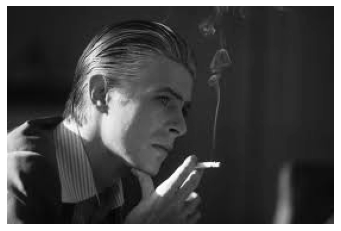

In [20]:
vis.imshow(bowie_gray)

In [21]:
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(16, 16), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)

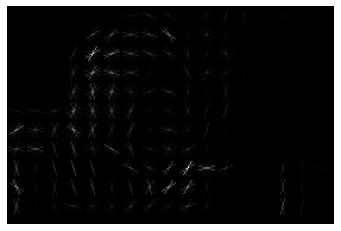

In [22]:
vis.imshow(hog_image)

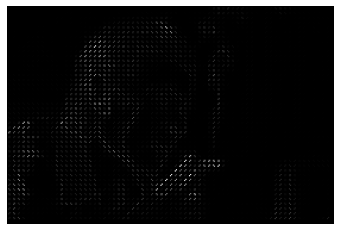

In [23]:
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
vis.imshow(hog_image)

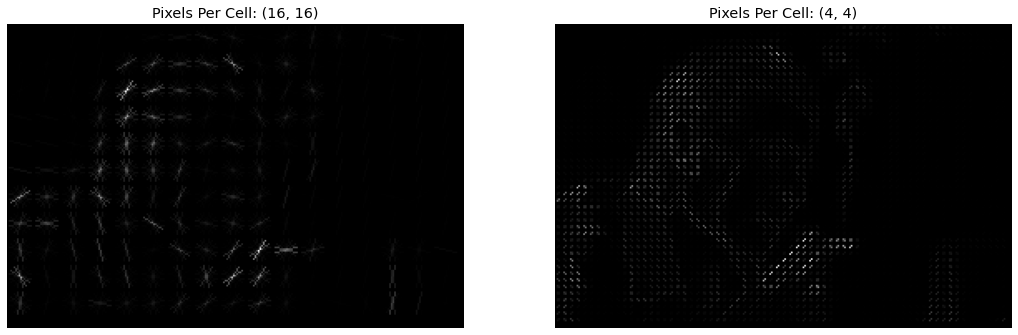

In [24]:
plt.figure(figsize=(18, 9))
plt.subplot(121)
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(16, 16), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
vis.imshow(hog_image, "Pixels Per Cell: (16, 16)")

plt.subplot(122)
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
vis.imshow(hog_image, "Pixels Per Cell: (4, 4)")
plt.show()

In [25]:
equalized_bowie = equalize_hist(bowie_gray)

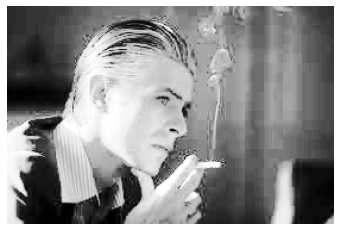

In [26]:
vis.imshow(equalized_bowie)

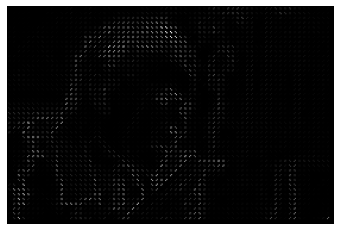

In [27]:
_, hog_image = hog(equalized_bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
hog_rescaled = vis.scale(hog_image, 0., 1., dtype="float")
vis.imshow(hog_rescaled)

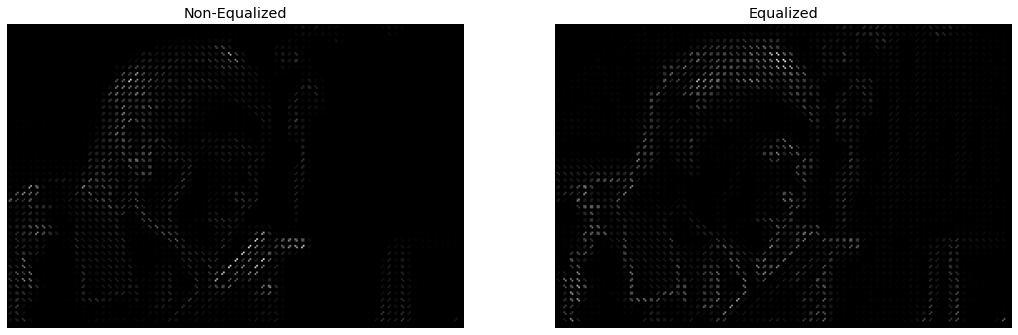

In [28]:
plt.figure(figsize=(18, 9))
plt.subplot(121)
_, hog_image = hog(bowie_gray, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
vis.imshow(hog_image, "Non-Equalized")

plt.subplot(122)
_, hog_image = hog(equalized_bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=False)
vis.imshow(hog_image, "Equalized")

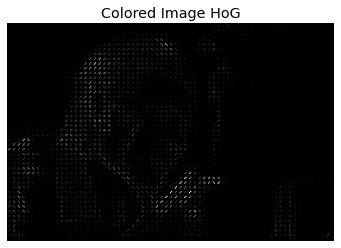

In [29]:
_, hog_image = hog(bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
vis.imshow(hog_image, "Colored Image HoG")

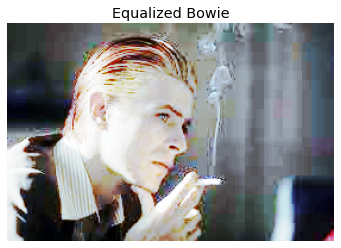

In [30]:
equalized_bowie_color = np.zeros_like(bowie, dtype="float")
for i in range(3):
    equalized_bowie_color[..., i] = equalize_hist(bowie[..., i])
    
vis.imshow(equalized_bowie_color, "Equalized Bowie")

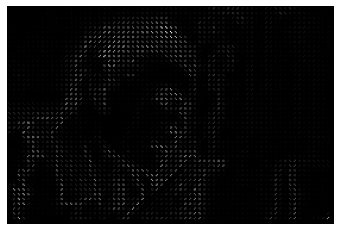

In [31]:
_, hog_image = hog(equalized_bowie_color, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
vis.imshow(hog_image)

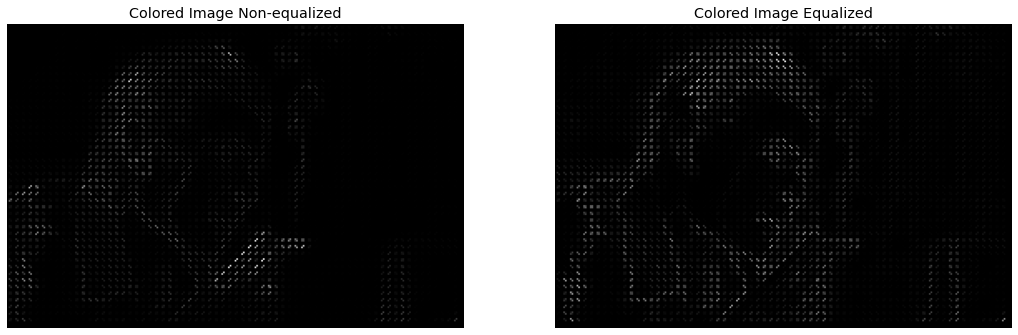

In [32]:
plt.figure(figsize=(18, 9))

plt.subplot(121)
_, hog_image = hog(bowie, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
vis.imshow(hog_image, "Colored Image Non-equalized")

plt.subplot(122)
_, hog_image = hog(equalized_bowie_color, orientations=8, 
                   pixels_per_cell=(4, 4), 
                   cells_per_block=(1, 1), visualize=True,
                   multichannel=True)
vis.imshow(hog_image, "Colored Image Equalized")

### **Preguntas**
1. Considera ud que la ecualización de la imagen mejoró el HoG? ¿Por qué?
2. Qué otras técnicas pueden ser aplicadas para mejorar el HoG?
3. Qué pasa cuando variamos el parámetro `pixels_per_cell`? Qué pasa cuando varíamos el parámetro `orientations`? Igualmente, qué pasa cuando varíamos el parámetro `cell_per_block`?
4. Realice el mismo procedimiento con la siguiente [url](https://drive.google.com/u/0/uc?id=1kQnVSScmxKLzcJ1kQ_t59vUbp7SYbBzz&export=download). Realice todas las operaciones de procesamiento de imagen que considere necesarias para poder obtener un buen HoG.